## Basic Regression in Python

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Import Seahawks Data

In [4]:
hawks = pd.read_csv('hawks_hw.csv')

In [5]:
hawks['WT'] = hawks['WT.'].astype(float)
hawks['HT'] = hawks['HT'].astype(float)

In [6]:
hawks.head()

,NAME,POS.,WT.,HT,WT
0,"Avril, Cliff",DE,260,75.0,260.0
1,"Baldwin, Doug",WR,192,70.0,192.0
2,"Bennett, Michael",DE,274,76.0,274.0
3,"Boykin, Trevone",QB,213,73.0,213.0
4,"Britt, Justin",C,315,78.0,315.0


## Regress Weight on Height
* While sklearn has an OLS (Ordinary Least Squares) implementation, statsmodels allows us to analyze more of the diagnostics
* Using the smf (statsmodels formula api) allows us to use R style formulas
* http://statsmodels.sourceforge.net/devel/example_formulas.html
* http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html

In [7]:
hawks_reg = smf.ols(formula='WT~ HT', data = hawks).fit()

In [8]:
hawks_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WT   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     39.09
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           8.25e-08
Time:                        22:56:33   Log-Likelihood:                -261.22
No. Observations:                  53   AIC:                             526.4
Df Residuals:                      51   BIC:                             530.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.1147    132.904     -4.403      0.000    -851.930    -318.299
HT            11.1672      1.786      6.252      0.000       7.581      14.753
==============================================================================
Omnibus:                        1.802   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.707
Skew:                           0.346   Prob(JB):                        0.426
Kurtosis:                       2.459   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
hawks['fitted1'] = hawks_reg.fittedvalues
hawks['resid1'] = hawks_reg.resid

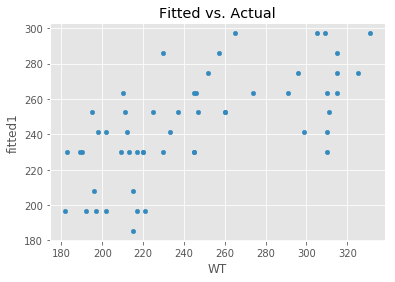

In [10]:
hawks.plot(kind='scatter', x='WT', y='fitted1', title='Fitted vs. Actual')

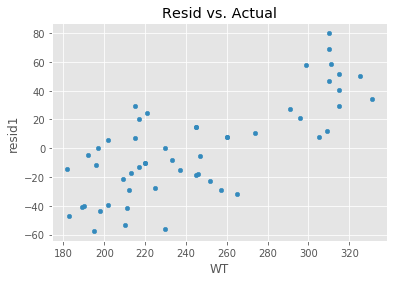

In [11]:
hawks.plot(kind='scatter', x='WT', y='resid1', title='Resid vs. Actual')

#### We can see that the residuals are higher when the weight is higher, and lower when weight is lower. This violates the homoscedasticity assumption.  It looks like we are missing a variable that might explain this pattern

## Add Lineman_Dummy and test

In [12]:
hawks['LINEMAN_DUMMY'] = hawks['POS.'].apply(lambda x: 1 if x in ['DT','G','T','C'] else 0)

In [13]:
hawks_reg_2 = smf.ols(formula='WT~ HT+LINEMAN_DUMMY', data = hawks).fit()

In [14]:
hawks_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WT   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           8.85e-21
Time:                        22:56:36   Log-Likelihood:                -227.35
No. Observations:                  53   AIC:                             460.7
Df Residuals:                      50   BIC:                             466.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -171.7457     79.617     -2.157      0.036    -331.661     -11.830
HT                5.3483      1.081      4.948      0.000       3.177       7.519
LINEMAN_DUMMY    73.1226      6.426     11.379      0.000      60.215      86.030
==============================================================================
Omnibus:                        1.241   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.025
Skew:                          -0.091   Prob(JB):                        0.599
Kurtosis:                       2.344   Cond. No.                     2.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
hawks['fitted2'] = hawks_reg_2.fittedvalues
hawks['resid2'] = hawks_reg_2.resid

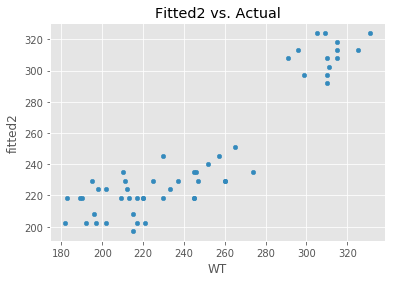

In [16]:
hawks.plot(kind='scatter', x='WT', y='fitted2', title='Fitted2 vs. Actual')

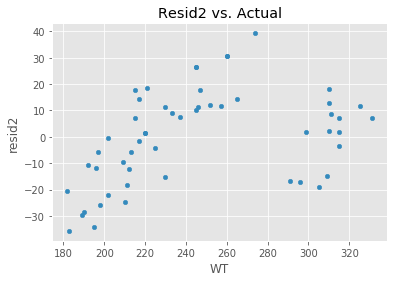

In [17]:
hawks.plot(kind='scatter', x='WT', y='resid2', title='Resid2 vs. Actual')

## Now our R-Squared has improved from .4 to .8, and our residual plots look much better.  We might want to control for other positions